**Methods**:

We plan to create scatter plots colour coded for class for each variable pair to visualise our data and figure out which variable pair best predicts whether a star is a pulsar.

1. Load the libraries tidyverse, tidymodels, repr, ggplot2 and patchwork.

2. Read the data from the web using the read_csv() function.

(i) Add column names to the dataframe using the mutate() function

(ii) Change the class to a categorical variable using the as_factor() function.

(iii) Name the output as pulsar_data.

3. Plot scatterplots for each set of variables namely

(i) Mean vs Standard deviation of the Integrated profile

(ii) Mean vs Skewness of the Integrated profile

(iii) Mean vs Excess kurtosis of the Integrated profile

(iv) Mean vs Standard deviation of the DM-SNR curve

(v) Mean vs Skewness of the DM-SNR curve

(vi) Mean vs Excess kurtosis of the DM-SNR curve

(iv) Skewness of the Integrated profile vs the Skewness of the DM-SNR curve,

using the ggplot function as shown below. Name the outputs as means_plot, std_dev_plot, excess_kurtosis_plot and skewness_plot respectively.


4. Split the data into two sets in a ratio of 3:1 using the initial_split() function. Name the output as pulsar_split.

5. Create a training and testing data sets by passing the object pulsar_split into the training and testing functions. Name the outputs as pulsar_training_data and pulsar_testing_data respectively.

5. Carry out a 5-fold cross-validation on the training data using the vfold_cv() function and name the output as pulsar_vfold

6. Create a knn classification model specification with a straight line as weight function and tuning on the number of neighbours. Name the output as knn_spec.

7. Create a recipe for the model using the means of the integrated profile and DM-SNR curve. Name the output as pulsar_mean_recipe.

8. Create a workflow analysis with the recipe and model specification using the tune_grid() function. Specify that the tuning should try 10 values of k and collect the metrics from the workflow analysis using the collect_metrics() function. Name the output as knn_mean_results.

9. Filter for accuracy from the knn_mean_results and name the output as mean_accuracies.

10. Plot the neighbours k vs the accuracy using the ggplot function. Assign this plot to an object called mean_accuracy_versus_k_plot.

11. Repeat steps 7 to 10 for each set of variables and name the outputs respectively.

12. Analyse the accuracy vs k plots for each set of variable and choose the set with the highest accuracy.

13. Build the model from the set chosen in step 12.

14. Create a specification for our final knn classification model with a straight line as weight function and using the k-value with the highest accuracy from the set chosen in step 12 as neighbor. Name the output as pulsar_model_spec. 

15. Pass the model specification in step 14 and the training data set to the fit() function. Assign the answer to an object called pulsar_model_fit.

16. Use the final model to predict on the test dataset and assign this to an object called pulsar_predictions.

17. Report the accuracy of this prediction using the metrics() function, and store this in an object named pulsar_metrics.

18. Report the confusion matrix using the conf_mat() function and and store this in an object named mnist_conf_mat.

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
library(ggplot2)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [3]:
#Reading data from the web

set.seed(19)

pulsar_data <- read_csv("https://github.com/kseniak1/DSCI100-Group-Project/raw/main/HTRU_2%5B1%5D.csv", col_names = FALSE) %>%
                rename("mean_ip" = X1, 
                       "std_dev_ip" = X2, 
                       "excess_kurtosis_ip" = X3, 
                       "skewness_ip" = X4, 
                       "mean_dm" = X5,
                       "std_dev_dm" = X6,
                       "excess_kurtosis_dm" = X7,
                       "skewness_dm" = X8,
                       "class" = X9) %>%
                mutate(class = as_factor(class)) %>%
                sample_n(size = 500)

pulsar_data   

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double()
)



mean_ip,std_dev_ip,excess_kurtosis_ip,skewness_ip,mean_dm,std_dev_dm,excess_kurtosis_dm,skewness_dm,class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
107.91406,37.32941,0.30272446,1.58089787,3.9272575,24.924345,6.711611,46.2225904,0
14.70312,29.81594,7.21863076,52.86635443,81.6028428,57.256627,1.058996,1.2584176,1
99.52344,54.36896,0.63675112,-0.22504476,2.2784281,15.332172,10.197710,127.5418937,0
106.06250,51.40354,0.31323378,-0.33572020,4.6889632,26.324866,6.360699,42.3073497,0
128.97656,55.67406,-0.08570242,-0.59446104,5.8586957,30.994971,5.618643,32.0538478,0
128.62500,43.70212,0.15793456,0.46496956,49.1906355,78.242754,1.043050,-0.7616284,0
95.39844,48.16286,0.51860972,0.49351065,2.2784281,18.554590,10.275586,114.6954798,0
123.57031,50.13352,0.13839104,-0.19433412,4.2433110,20.507895,6.616925,52.5052344,0
113.39844,51.77843,0.26218746,0.20984763,1.8545151,18.093558,10.431586,113.0406108,0


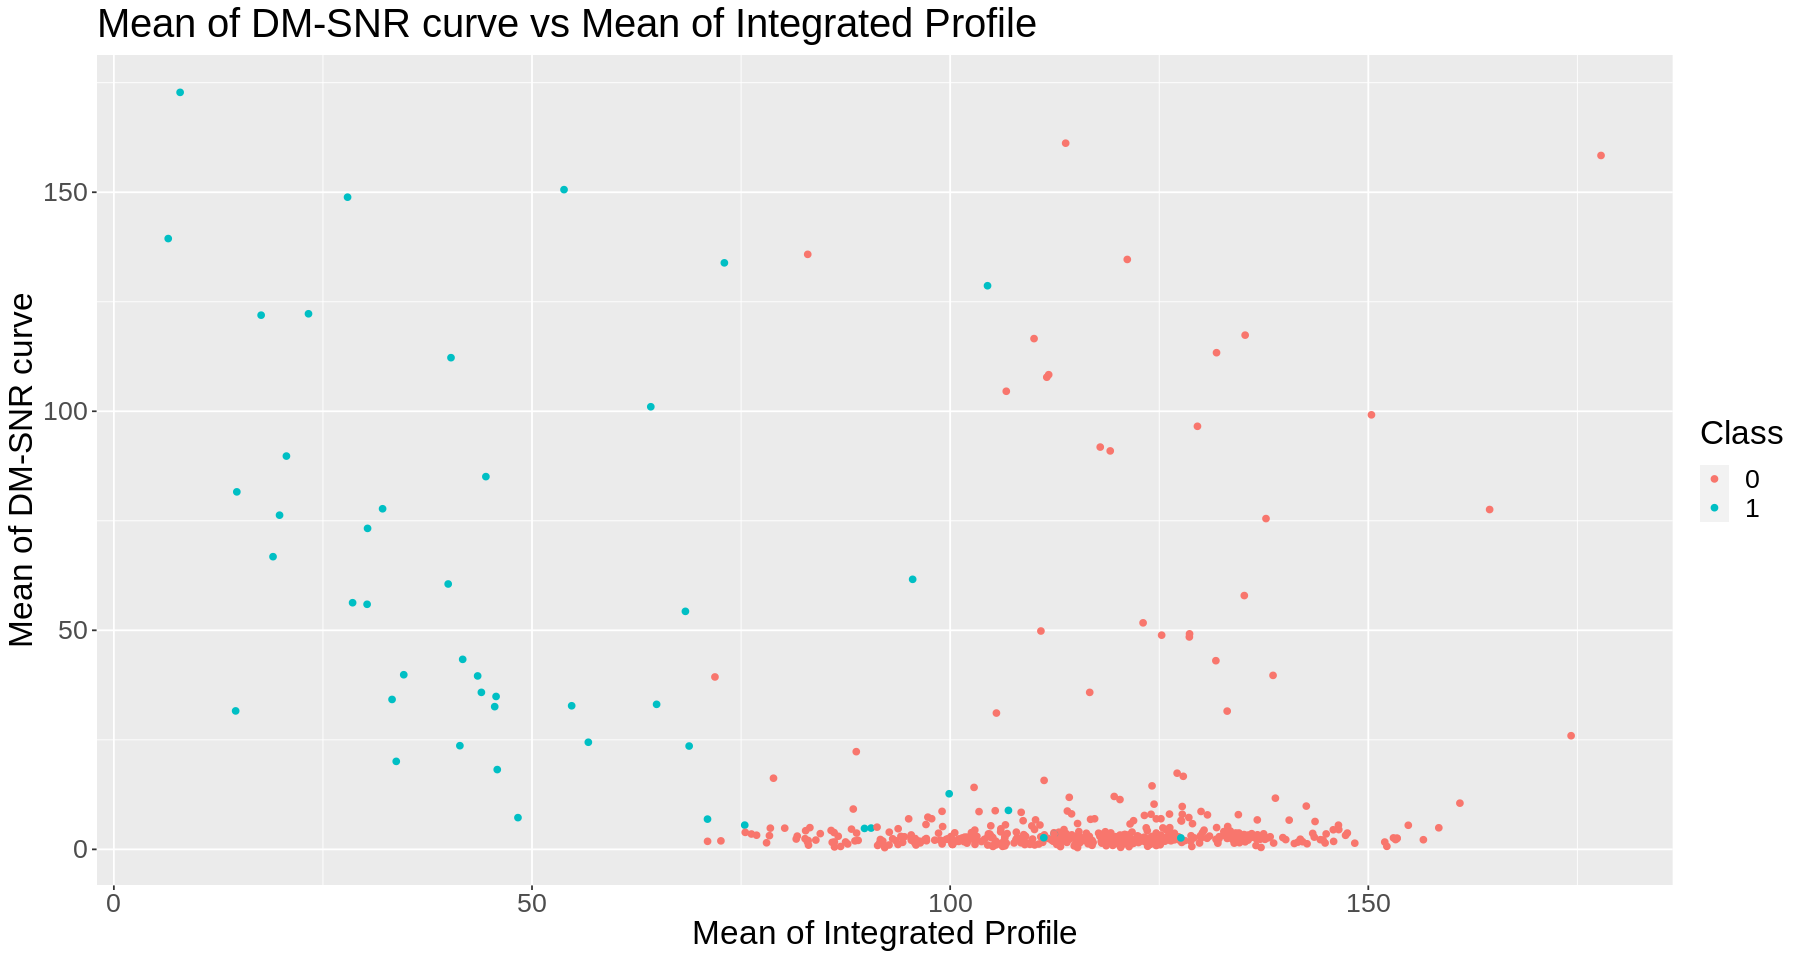

In [4]:
#Plotting scatterplots for Mean Intergrated Profile vs DM-SNR curve

options(repr.plot.width = 15, repr.plot.height = 8)

means_plot <- pulsar_data %>%
                ggplot(aes(x = mean_ip, y = mean_dm, color = class)) +
                geom_point() +
                labs(x = "Mean of Integrated Profile", y = "Mean of DM-SNR curve", color = "Class") +
                ggtitle("Mean of DM-SNR curve vs Mean of Integrated Profile") +
                theme(text = element_text(size = 20))
means_plot

In [5]:
set.seed(19)

#Splitting our data

pulsar_split <- initial_split(pulsar_data, prop = 0.75, strata = class)  
pulsar_training_data <- training(pulsar_split)   
pulsar_testing_data <- testing(pulsar_split)

#Cross validation
pulsar_vfold <- vfold_cv(pulsar_training_data, v = 5, strata = class)

#knn model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
       set_engine("kknn") %>%
       set_mode("classification")

In [6]:
#Accuracy vs k plot for Mean and Standard deviation of Integrated Profile"

set.seed(19)

pulsar_ip_recipe_1 <- recipe(class ~ mean_ip + std_dev_ip , data = pulsar_training_data) %>%
     step_scale(all_predictors()) %>%
     step_center(all_predictors())

k_values_1 <- tibble(neighbors = 1:10)

knn_ip_results_1 <- workflow() %>%
       add_recipe(pulsar_ip_recipe_1) %>%
       add_model(knn_spec) %>%
       tune_grid(resamples = pulsar_vfold, grid = k_values_1) %>%
       collect_metrics() %>%
       filter(.metric == "accuracy")

ip_plot_1 <- ggplot(knn_ip_results_1, aes(x = neighbors, y = mean)) +
       geom_point() +
       geom_line() +
       scale_x_continuous(breaks = seq(0, 10, by = 1)) +
       scale_y_continuous(limits = c(0.7, 1.0)) +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       ggtitle("Mean and Std dev of Integrated Profile") +
       theme(text = element_text(size = 10)) 

In [7]:
#Accuracy vs k plot for Mean and Skewness of Integrated Profile"

set.seed(19)

pulsar_ip_recipe_2 <- recipe(class ~ mean_ip + skewness_ip , data = pulsar_training_data) %>%
     step_scale(all_predictors())%>%
     step_center(all_predictors())

k_values_2 <- tibble(neighbors = 1:10)

knn_ip_results_2 <- workflow() %>%
       add_recipe(pulsar_ip_recipe_2) %>%
       add_model(knn_spec) %>%
       tune_grid(resamples = pulsar_vfold, grid = k_values_2) %>%
       collect_metrics() %>% 
       filter(.metric == "accuracy")

ip_plot_2 <- ggplot(knn_ip_results_2, aes(x = neighbors, y = mean)) +
       geom_point() +
       geom_line() +
       scale_x_continuous(breaks = seq(0, 10, by = 1)) +
       scale_y_continuous(limits = c(0.7, 1.0)) +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       ggtitle("Mean and Skewness of Integrated Profile") +
       theme(text = element_text(size = 10)) 

In [8]:
#Accuracy vs k plot for Mean and Excess kurtosis of Integrated Profile"

set.seed(19)

pulsar_ip_recipe_3 <- recipe(class ~ mean_ip + excess_kurtosis_ip , data = pulsar_training_data) %>%
     step_scale(all_predictors())%>%
     step_center(all_predictors())

k_values_3 <- tibble(neighbors = 1:10)

knn_ip_results_3 <- workflow() %>%
       add_recipe(pulsar_ip_recipe_3) %>%
       add_model(knn_spec) %>%
       tune_grid(resamples = pulsar_vfold, grid = k_values_3) %>%
       collect_metrics() %>% 
       filter(.metric == "accuracy")

ip_plot_3 <- ggplot(knn_ip_results_3, aes(x = neighbors, y = mean)) +
       geom_point() +
       geom_line() +
       scale_x_continuous(breaks = seq(0, 10, by = 1)) +
       scale_y_continuous(limits = c(0.7, 1.0)) +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       ggtitle("Mean and Excess kurtosis of Integrated Profile") +
       theme(text = element_text(size = 10)) 

In [9]:
#Accuracy vs k plot for Mean and Standard deviation of DM-SNR curve"

set.seed(19)

pulsar_dm_recipe_1 <- recipe(class ~ mean_dm + std_dev_dm , data = pulsar_training_data) %>%
     step_scale(all_predictors())%>%
     step_center(all_predictors())

k_values_1 <- tibble(neighbors = 1:10)

knn_dm_results_1 <- workflow() %>%
       add_recipe(pulsar_dm_recipe_1) %>%
       add_model(knn_spec) %>%
       tune_grid(resamples = pulsar_vfold, grid = k_values_3) %>%
       collect_metrics() %>% 
       filter(.metric == "accuracy")

dm_plot_1 <- ggplot(knn_dm_results_1, aes(x = neighbors, y = mean)) +
       geom_point() +
       geom_line() +
       scale_x_continuous(breaks = seq(0, 10, by = 1)) +
       scale_y_continuous(limits = c(0.7, 1.0)) +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       ggtitle("Mean and Std dev of DM-SNR curve") +
       theme(text = element_text(size = 10)) 

In [10]:
#Accuracy vs k plot for Mean and Skewness of DM-SNR curve"

set.seed(19)

pulsar_dm_recipe_2 <- recipe(class ~ mean_dm + skewness_dm , data = pulsar_training_data) %>%
     step_scale(all_predictors())%>%
     step_center(all_predictors())

k_values_2 <- tibble(neighbors = 1:10)

knn_dm_results_2 <- workflow() %>%
       add_recipe(pulsar_dm_recipe_2) %>%
       add_model(knn_spec) %>%
       tune_grid(resamples = pulsar_vfold, grid = k_values_2) %>%
       collect_metrics() %>% 
       filter(.metric == "accuracy")

dm_plot_2 <- ggplot(knn_dm_results_2, aes(x = neighbors, y = mean)) +
       geom_point() +
       geom_line() +
       scale_x_continuous(breaks = seq(0, 10, by = 1)) +
       scale_y_continuous(limits = c(0.7, 1.0)) +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       ggtitle("Mean and Skewness of DM-SNR curve") +
       theme(text = element_text(size = 10)) 

In [11]:
#Accuracy vs k plot for Mean and Excess kurtosis of DM-SNR curve"

set.seed(19)

pulsar_dm_recipe_3 <- recipe(class ~ mean_dm + excess_kurtosis_dm , data = pulsar_training_data) %>%
     step_scale(all_predictors())%>%
     step_center(all_predictors())

k_values_3 <- tibble(neighbors = 1:10)

knn_dm_results_3 <- workflow() %>%
       add_recipe(pulsar_dm_recipe_3) %>%
       add_model(knn_spec) %>%
       tune_grid(resamples = pulsar_vfold, grid = k_values_3) %>%
       collect_metrics() %>% 
       filter(.metric == "accuracy")

dm_plot_3 <- ggplot(knn_dm_results_3, aes(x = neighbors, y = mean)) +
       geom_point() +
       geom_line() +
       scale_x_continuous(breaks = seq(0, 10, by = 1)) +
       scale_y_continuous(limits = c(0.7, 1.0)) +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       ggtitle("Mean and Excess kurtosis of DM-SNR curve") +
       theme(text = element_text(size = 10)) 

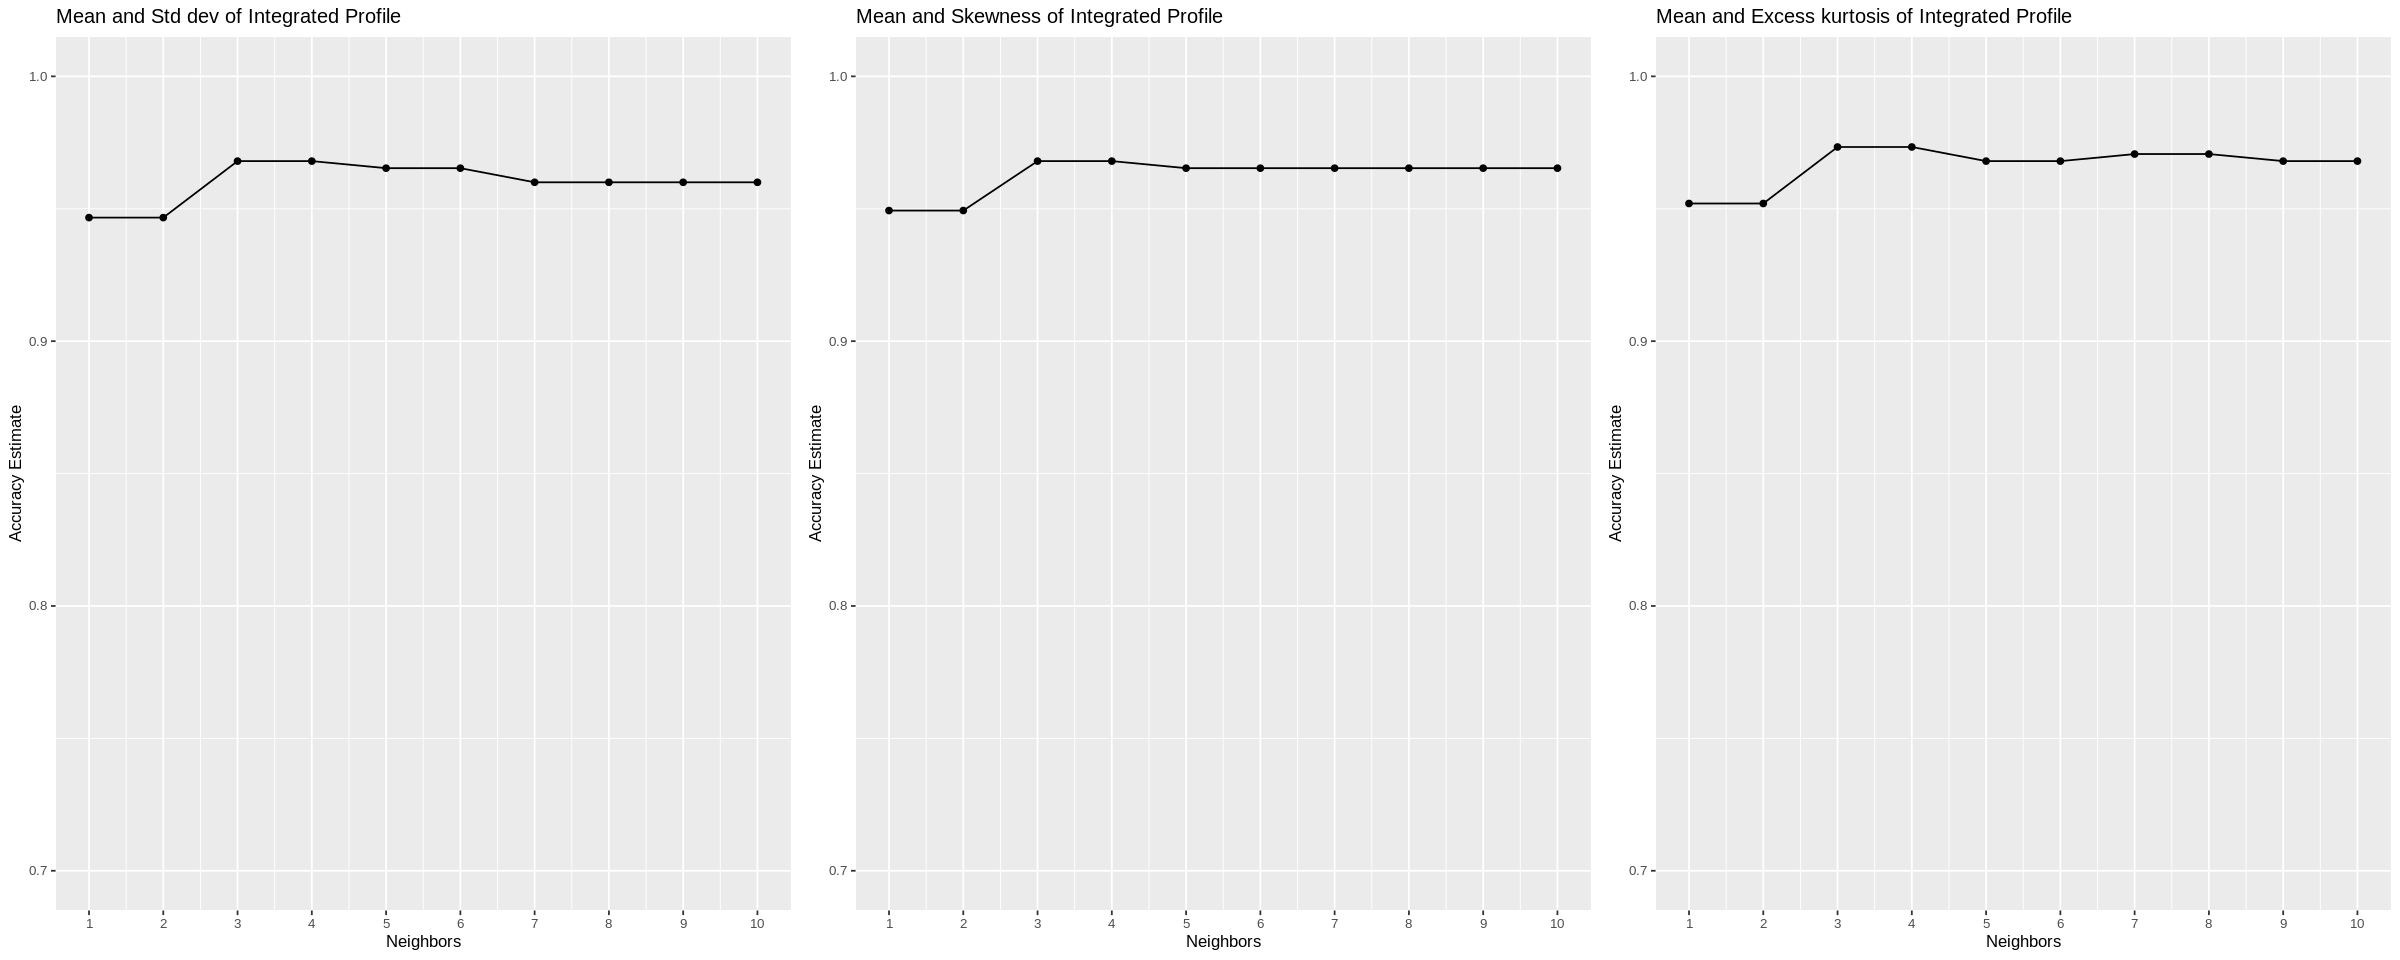

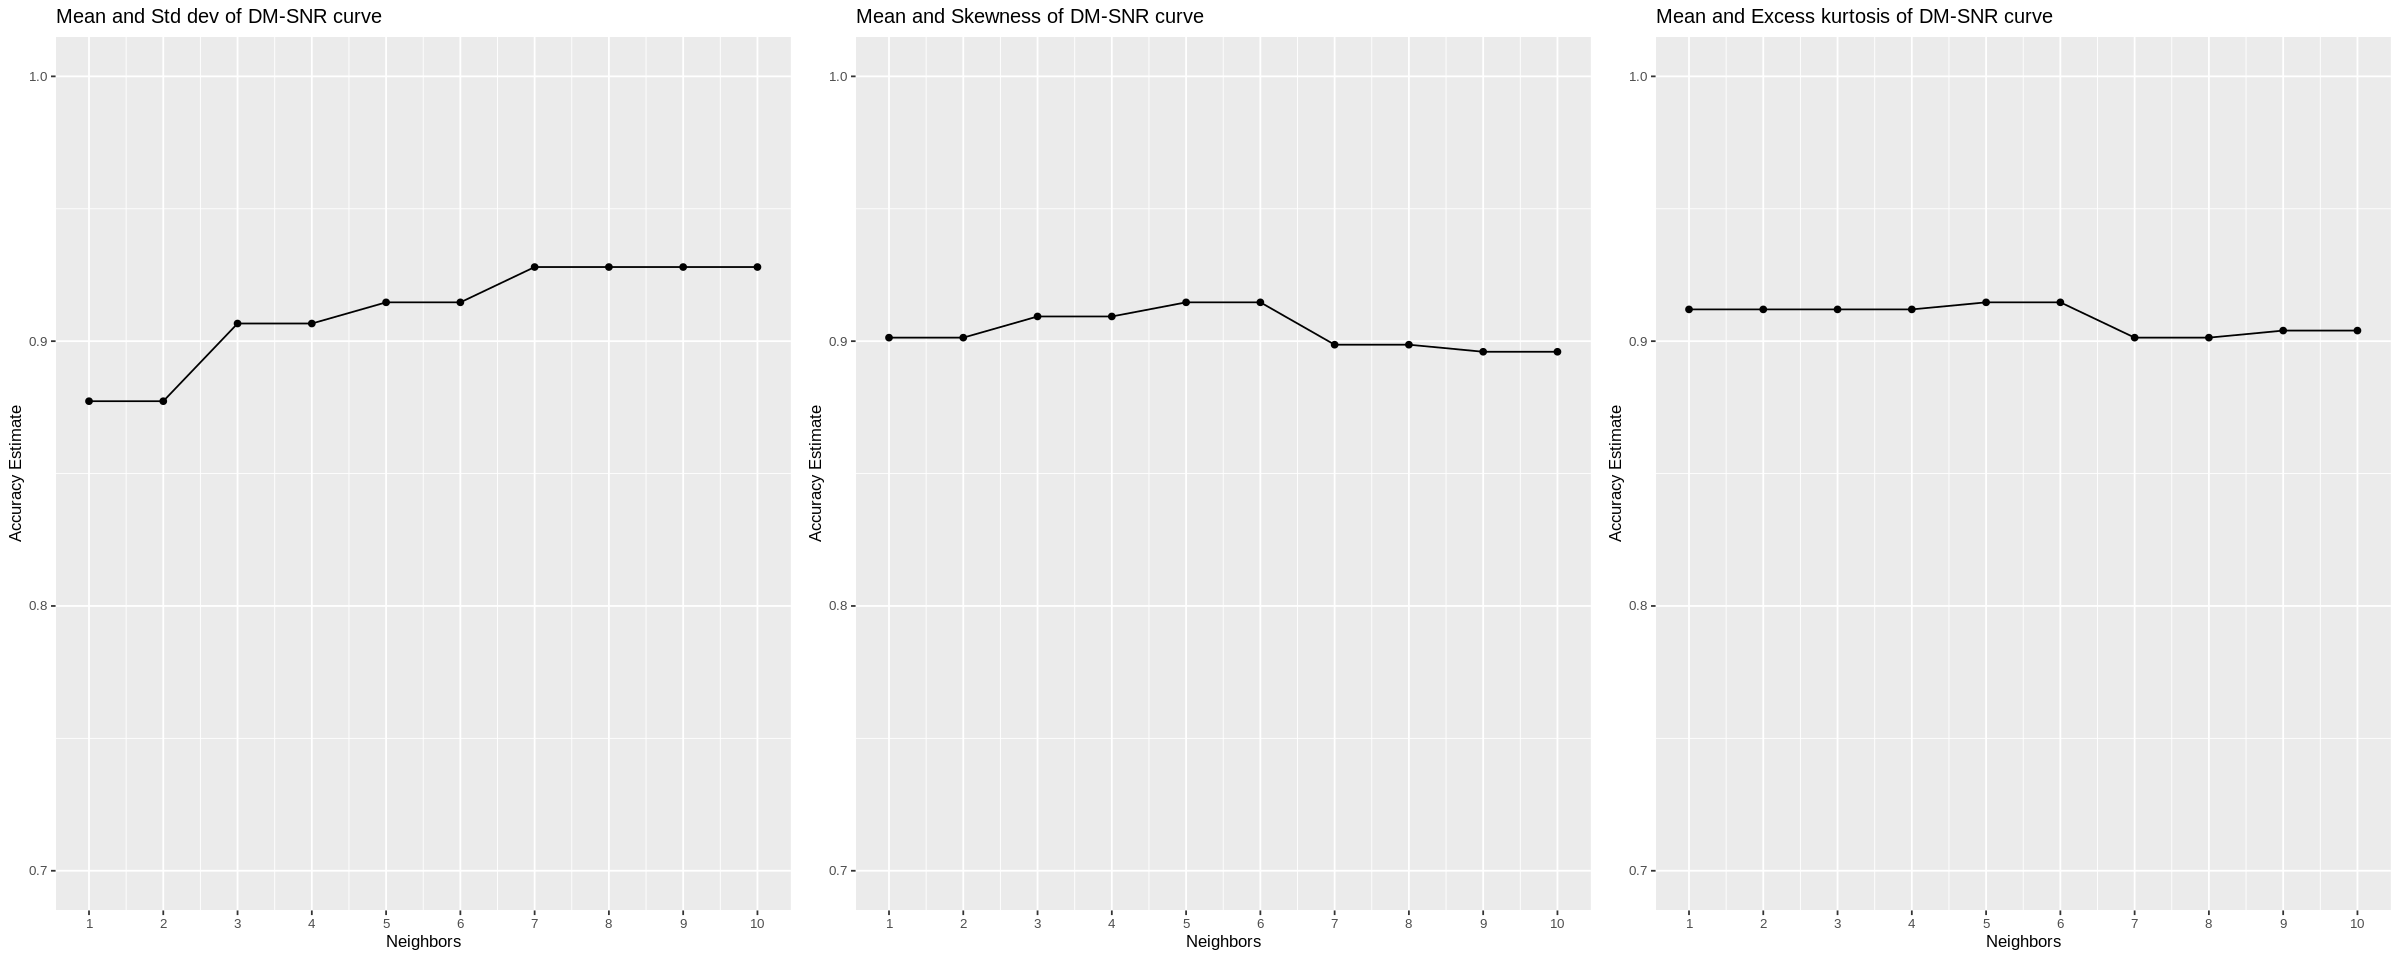

In [12]:
options(repr.plot.width = 20, repr.plot.height = 8)
plot_grid(ip_plot_1, ip_plot_2, ip_plot_3, ncol = 3)
plot_grid(dm_plot_1, dm_plot_2, dm_plot_3, ncol = 3)

In [13]:
#Choosing the best variable pair

max_ip_dev <- knn_ip_results_1 %>%
                arrange(desc(mean)) %>%
                slice(1) %>%
                select(neighbors, mean) %>%
                mutate(variables = "Mean IP & Std dev")

max_ip_skewness <- knn_ip_results_2 %>%
                arrange(desc(mean)) %>%
                slice(1) %>%
                select(neighbors, mean) %>%
                mutate(variables = "Mean IP & Skewness")

max_ip_kurtosis <- knn_ip_results_3 %>%
                arrange(desc(mean)) %>%
                slice(1) %>%
                select(neighbors, mean) %>%
                mutate(variables = "Mean IP & Excess kurtosis")

max_dm_dev <- knn_dm_results_1 %>%
                arrange(desc(mean)) %>%
                slice(1) %>%
                select(neighbors, mean) %>%
                mutate(variables = "Mean DM-SNR & Std dev")

max_dm_skewness <- knn_dm_results_2 %>%
                arrange(desc(mean)) %>%
                slice(1) %>%
                select(neighbors, mean) %>%
                mutate(variables = "Mean DM-SNR & Skewness")

max_dm_kurtosis <- knn_dm_results_3 %>%
                arrange(desc(mean)) %>%
                slice(1) %>%
                select(neighbors, mean) %>%
                mutate(variables =  "Mean DM-SNR & excess kurtosis")

max_accuracies <- bind_rows(max_ip_dev,max_ip_skewness, max_ip_kurtosis, max_dm_dev, max_dm_skewness, max_dm_kurtosis) %>%
                  arrange(desc(mean))
max_accuracies

neighbors,mean,variables
<int>,<dbl>,<chr>
3,0.9733333,Mean IP & Excess kurtosis
3,0.9680000,Mean IP & Std dev
3,0.9680000,Mean IP & Skewness
7,0.9280000,Mean DM-SNR & Std dev
5,0.9146667,Mean DM-SNR & Skewness
5,0.9146667,Mean DM-SNR & excess kurtosis


In [14]:
#Building our model using Mean IP and Excess kurtosis predictors

pulsar_model_spec <- nearest_neighbor(weight_func = "rectangular", neighbor = 3) %>%
                set_engine("kknn") %>%
                set_mode("classification")

pulsar_model_fit <- workflow() %>%
            add_recipe(pulsar_ip_recipe_3) %>%
            add_model(pulsar_model_spec) %>%
            fit(data = pulsar_training_data)

pulsar_predictions <- predict(pulsar_model_fit, pulsar_testing_data) %>%
                        bind_cols(pulsar_testing_data)

pulsar_metrics <- pulsar_predictions %>%
                    metrics(truth = class, estimate = .pred_class)
pulsar_metrics

pulsar_conf_mat <- pulsar_predictions %>%
                    conf_mat(truth = class, estimate = .pred_class)
pulsar_conf_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9920000
kap,binary,0.9584856


          Truth
Prediction   0   1
         0 111   1
         1   0  13

In [15]:
#Predicting the class of a new observation using our model

set.seed(19)

new_observation <- tibble(mean_ip = 126.583,
                         excess_kurtosis_ip = 0.1754)

class_prediction <- predict(pulsar_model_fit, new_observation)
class_prediction

.pred_class
<fct>
0


In [16]:
#Visualization of classification with unscaled data

set.seed(19)

mean_vs_kurtosis_plot <- pulsar_data %>%
                            ggplot(aes(x = excess_kurtosis_ip, y = mean_ip, color = class)) +
                            geom_point() +
                            geom_point(aes(x = 0.1754, y = 126.583), color = "black", size = 3) +
                            labs(x = "Excess kurtosis", y = "Mean", color = "Class") +
                            ggtitle("Mean vs Excess kurtosis of Integrated Profile") +
                            theme(text = element_text(size = 12))

In [17]:
#Visualization of classification with scaled data

set.seed(19)

scaled_pulsar_data <- pulsar_data %>%
                        select(mean_ip, excess_kurtosis_ip, class) %>%
                        mutate(scaled_mean_ip = scale(mean_ip, center = TRUE),
                               scaled_excess_kurtosis_ip = scale(excess_kurtosis_ip, center = TRUE))

predicted_new_observation <- tibble(mean_ip = 126.583,
                         excess_kurtosis_ip = 0.1754,
                         class = "0")

scaled_pulsar_data_with_new_obs <- pulsar_data %>%
                        select(mean_ip, excess_kurtosis_ip, class) %>%
                        bind_rows(predicted_new_observation) %>%
                        mutate(scaled_mean_ip = scale(mean_ip, center = TRUE),
                               scaled_excess_kurtosis_ip = scale(excess_kurtosis_ip, center = TRUE))

scaled_mean_vs_kurtosis_plot <- scaled_pulsar_data %>%
                            ggplot(aes(x = scaled_excess_kurtosis_ip, y = scaled_mean_ip, color = class)) +
                            geom_point() +
                            geom_point(aes(x = -0.29523007, y = 0.60587088), color = "black", size = 3) +
                            labs(x = "Scaled excess kurtosis", y = "Scaled mean", color = "Class") +
                            ggtitle("Scaled mean vs scaled excess kurtosis of Integrated Profile") +
                            theme(text = element_text(size = 12))

.pred_class
<fct>
0


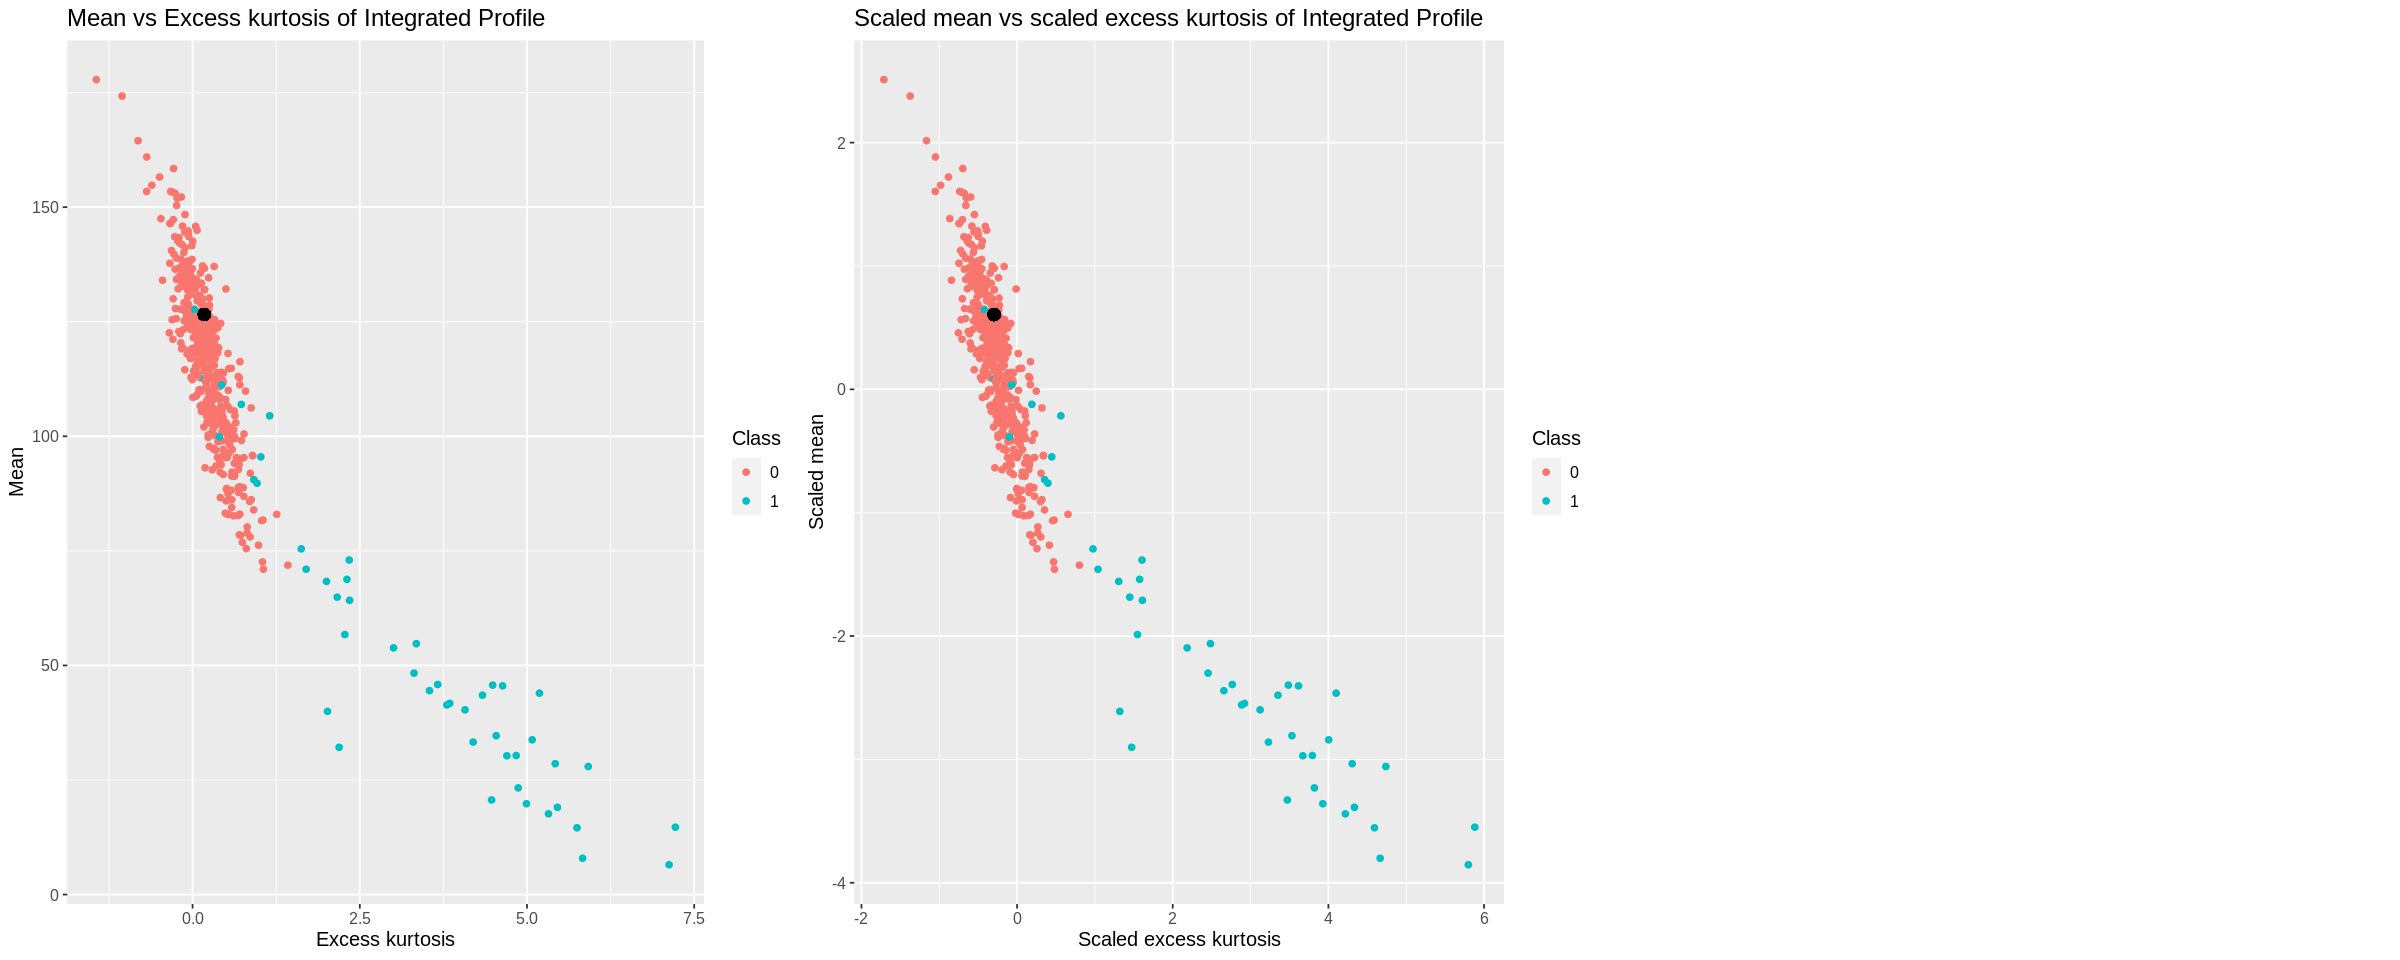

In [18]:
options(repr.plot.width = 20, repr.plot.height = 8)

plot_grid(mean_vs_kurtosis_plot, scaled_mean_vs_kurtosis_plot, ncol = 3)

class_prediction

In [24]:
set.seed(19)
random_mean = runif(1, min = 5.8125000, max = 192.617188)
random_excess = runif(1, min = -1.8760112, max = 7.879628)
random_point = tibble(mean_ip = random_mean, excess_kurtosis_ip = random_excess)
random_point

class_prediction_2 <- predict(pulsar_model_fit, random_point)
class_prediction_2

mean_ip,excess_kurtosis_ip
<dbl>,<dbl>
27.69304,2.846008


.pred_class
<fct>
1


In [31]:
set.seed(19)

predicted_new_observation <- tibble(mean_ip = 27.69304,
                         excess_kurtosis_ip = 2.846008,
                         class = "1")

scaled_pulsar_data_with_new_obs <- pulsar_data %>%
                        select(mean_ip, excess_kurtosis_ip, class) %>%
                        bind_rows(predicted_new_observation) %>%
                        mutate(scaled_mean_ip = scale(mean_ip, center = TRUE),
                               scaled_excess_kurtosis_ip = scale(excess_kurtosis_ip, center = TRUE))

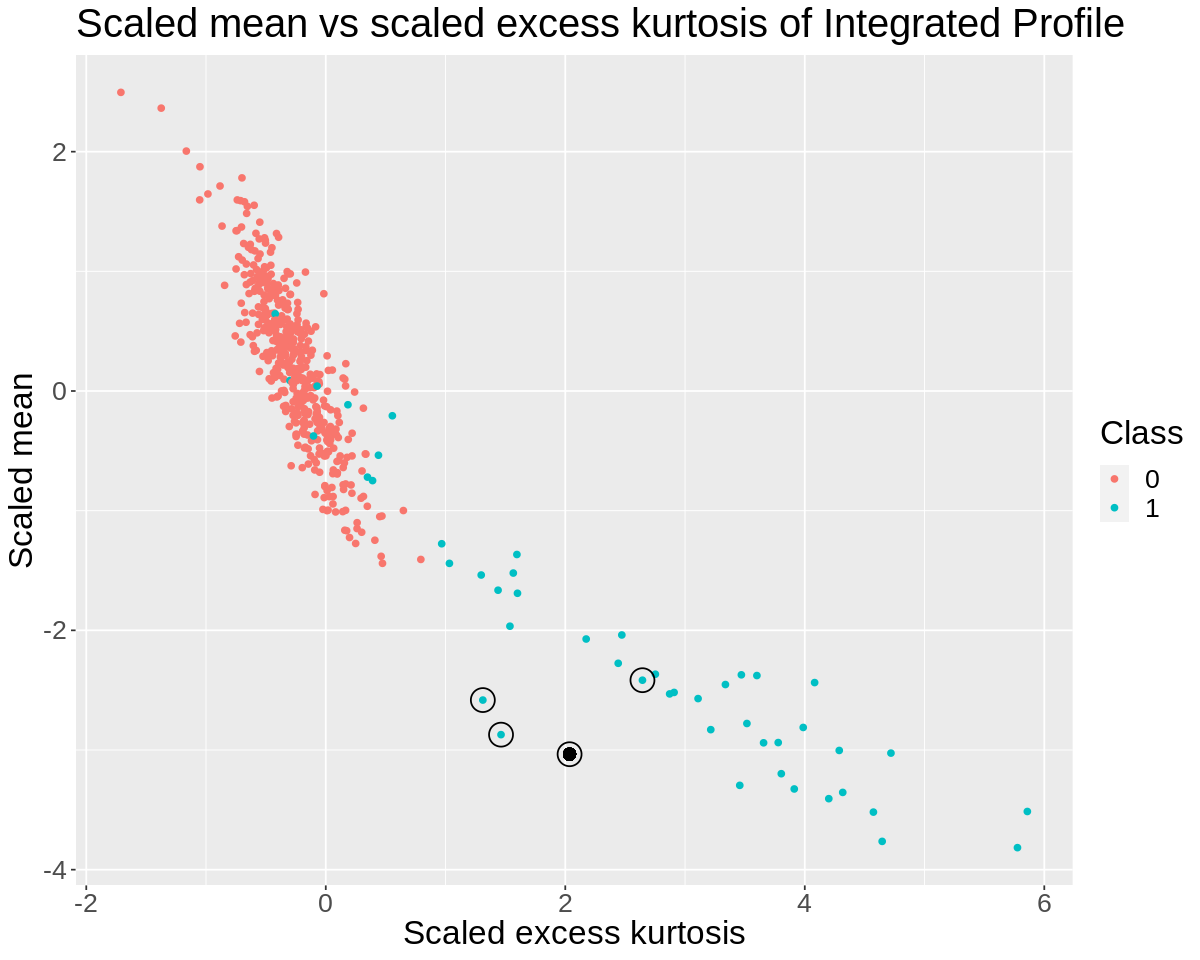

In [53]:
options(repr.plot.width = 10, repr.plot.height = 8)

point1 <- c(2.03597849, -3.03524016)
point2 <- c(1.46349305, -2.87168441)
point3 <- c(1.31160611, -2.58273031)
point4 <- c(2.64447567, -2.41666804)

scaled_mean_vs_kurtosis_plot_2 <- scaled_pulsar_data_with_new_obs %>%
                            ggplot(aes(x = scaled_excess_kurtosis_ip, y = scaled_mean_ip, color = class)) +
                            geom_point() +
                            geom_point(aes(x = 2.03597849, y = -3.03524016), color = "black", size = 3) +
                            labs(x = "Scaled excess kurtosis", y = "Scaled mean", color = "Class") +
                            ggtitle("Scaled mean vs scaled excess kurtosis of Integrated Profile") +
                            theme(text = element_text(size = 20)) +

                            annotate("path", 
                             x=point1[1] + 0.1*cos(seq(0,2*pi,length.out=100)),
                             y=point1[2] + 0.1*sin(seq(0,2*pi,length.out=100))) +
                    
                            annotate("path", 
                             x=point2[1] + 0.1*cos(seq(0,2*pi,length.out=100)),
                             y=point2[2] + 0.1*sin(seq(0,2*pi,length.out=100))) +
                            
                            annotate("path", 
                             x=point3[1] + 0.1*cos(seq(0,2*pi,length.out=100)),
                             y=point3[2] + 0.1*sin(seq(0,2*pi,length.out=100))) +
                             
                            annotate("path", 
                             x=point4[1] + 0.1*cos(seq(0,2*pi,length.out=100)),
                             y=point4[2] + 0.1*sin(seq(0,2*pi,length.out=100)))
                            
scaled_mean_vs_kurtosis_plot_2 

In [46]:
ada <- scaled_pulsar_data_with_new_obs %>%
        filter(class == "1") %>%
        arrange(scaled_excess_kurtosis_ip)
ada

mean_ip,excess_kurtosis_ip,class,scaled_mean_ip,scaled_excess_kurtosis_ip
<dbl>,<dbl>,<chr>,"<dbl[,1]>","<dbl[,1]>"
127.585938,0.03421603,1,0.64469127,-0.42211105
112.453125,0.17536358,1,0.08721708,-0.29871881
99.882812,0.39992690,1,-0.37585777,-0.10240388
111.195312,0.43431878,1,0.04088082,-0.07233824
106.968750,0.72880248,1,-0.11482055,0.18510161
90.546875,0.91552752,1,-0.71978222,0.34833803
89.757812,0.96405992,1,-0.74885031,0.39076542
95.515625,1.02031913,1,-0.53673958,0.43994764
104.468750,1.15313619,1,-0.20691747,0.55605731
